In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from psifr import fr
from cfr import framework
from cfr import figures

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_mixed_eeg.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(model_dir, 'fits', 'v5')
fig_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr/figs/sim2'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

## Load model fits

In [2]:
models = [
    'cmrs_fcf-loc-cat-use',
    'cmrs_fcf-loc-cat-use_sl-B_enc',
    'cmrs_fcf-loc-cat-use_sl-B_rec',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_enc_cat1',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_enc_use1',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_enc_cat1-B_enc_use1',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_cat1',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_use1',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_cat1-B_rec_use1',
]
model_names = ['ICD', 'ICD-E', 'ICD-R', 'ICD-ER', 'ICD-ER-EC', 'ICD-ER-ED', 'ICD-ER-ECD', 'ICD-ER-RC', 'ICD-ER-RD', 'ICD-ER-RCD']
res = framework.read_model_fits(fit_dir, models, model_names)
res

rep    T       Lfc       Lcf        P1        P2  \
model      subject                                                     
ICD        1          1  0.1  0.129424  0.058593  0.019413  0.697093   
           2          0  0.1  0.124923  0.145589  0.047002  0.402589   
           3          4  0.1  0.077447  0.060130  0.014340  2.395219   
           5          1  0.1  0.092995  0.075921  0.042064  0.679784   
           8          1  0.1  0.067535  0.031201  0.012248  0.803299   
...                 ...  ...       ...       ...       ...       ...   
ICD-ER-RCD 42         0  0.1  0.042027  0.039154  0.045116  4.979450   
           43         2  0.1  0.050838  0.005367  0.025207  0.457719   
           44         2  0.1  0.003486  0.000000  0.173635  0.897416   
           45         3  0.1  0.018640  0.000033  0.000054  2.809145   
           46         3  0.1  0.123696  0.089159  0.056993  0.483724   

                       B_enc   B_start     B_rec        X1  ...   Lcf_use  \
model      subject                                          ...             
ICD        1        0.730592  0.869588  0.907383  0.007905  ...  0.007657   
           2        0.737667  0.924383  0.879199  0.001005  ...  0.017684   
           3        0.635304  0.001734  0.882577  0.004910  ...  0.005657   
           5        0.498717  0.000000  0.826398  0.001096  ...  0.000300   
           8        0.610174  0.546840  0.804364  0.009349  ...  0.002591   
...                      ...       ...       ...       ...  ...       ...   
ICD-ER-RCD 42            NaN  0.003281       NaN  0.015242  ...  0.005677   
           43            NaN  0.938704       NaN  0.000848  ...  0.000570   
           44            NaN  0.325147       NaN  0.005365  ...  0.000000   
           45            NaN  0.782954       NaN  0.012103  ...  0.000001   
           46            NaN  0.745619       NaN  0.000692  ...  0.004375   

                           logl      n     k  B_enc_loc  B_enc_cat  B_enc_use  \
model      subject                                                              
ICD        1        -850.033870  373.0  11.0        NaN        NaN        NaN   
           2        -996.360537  426.0  11.0        NaN        NaN        NaN   
           3        -893.871382  379.0  11.0        NaN        NaN        NaN   
           5       -1049.078923  517.0  11.0        NaN        NaN        NaN   
           8        -746.246470  320.0  11.0        NaN        NaN        NaN   
...                         ...    ...   ...        ...        ...        ...   
ICD-ER-RCD 42       -730.650113  311.0  13.0   0.606889   0.994467   0.485632   
           43      -1007.061884  428.0  13.0   0.636749   0.999984   0.915885   
           44       -852.467909  352.0  13.0   0.594113   0.000000   0.000000   
           45       -891.850252  374.0  13.0   0.616293   0.229369   0.107681   
           46       -977.547968  430.0  13.0   0.543320   0.000834   0.544971   

                    B_rec_loc  B_rec_cat  B_rec_use  
model      subject                                   
ICD        1              NaN        NaN        NaN  
           2              NaN        NaN        NaN  
           3              NaN        NaN        NaN  
           5              NaN        NaN        NaN  
           8              NaN        NaN        NaN  
...                       ...        ...        ...  
ICD-ER-RCD 42        0.722752        1.0        1.0  
           43        0.714716        1.0        1.0  
           44        0.718383        1.0        1.0  
           45        0.633823        1.0        1.0  
           46        0.636981        1.0        1.0  

[290 rows x 36 columns]

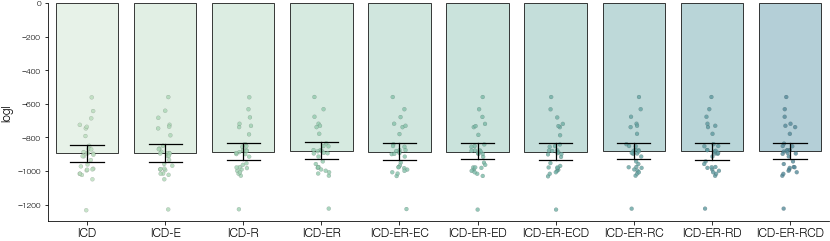

In [3]:
res_full = framework.model_comp_weights(res, stat='aic')
fig, ax = plt.subplots(figsize=(14, 4))
g = figures.plot_swarm_bar(
    data=res_full.reset_index(), x='model', y='logl', point_kind='strip', ax=ax
)

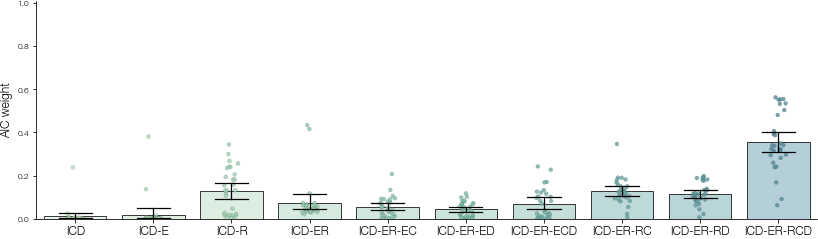

In [16]:
res_full = framework.model_comp_weights(res, stat='aic')
fig, ax = plt.subplots(figsize=(14, 4))
g = figures.plot_swarm_bar(
    data=res_full.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight', ylim=(0, 1.01));
fig.savefig(os.path.join(fig_dir, 'waic_full.pdf'))

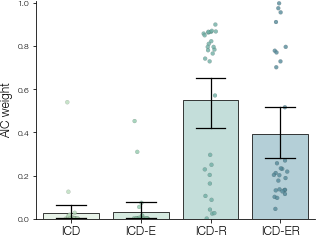

In [17]:
m = ['ICD', 'ICD-E', 'ICD-R', 'ICD-ER']
res_free = framework.model_comp_weights(res.loc[m], stat='aic')
fig, ax = plt.subplots(figsize=(5, 4))
g = figures.plot_swarm_bar(
    data=res_free.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight', ylim=(0, 1.01));
fig.savefig(os.path.join(fig_dir, 'waic_sl.pdf'))

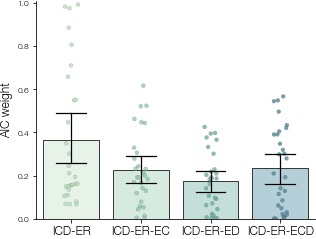

In [18]:
m = ['ICD-ER', 'ICD-ER-EC', 'ICD-ER-ED', 'ICD-ER-ECD']
res_enc = framework.model_comp_weights(res.loc[m], stat='aic')
fig, ax = plt.subplots(figsize=(5, 4))
g = figures.plot_swarm_bar(
    data=res_enc.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight', ylim=(0, 1.01));
fig.savefig(os.path.join(fig_dir, 'waic_fix_enc.pdf'))

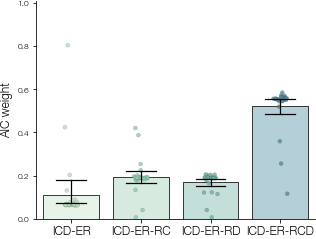

In [19]:
m = ['ICD-ER', 'ICD-ER-RC', 'ICD-ER-RD', 'ICD-ER-RCD']
res_rec = framework.model_comp_weights(res.loc[m], stat='aic')
fig, ax = plt.subplots(figsize=(5, 4))
g = figures.plot_swarm_bar(
    data=res_rec.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight', ylim=(0, 1.01));
fig.savefig(os.path.join(fig_dir, 'waic_fix_rec.pdf'))

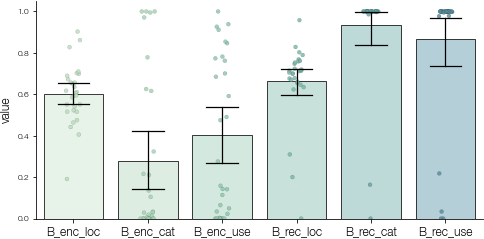

In [7]:
B_names = ['B_enc_loc', 'B_enc_cat', 'B_enc_use', 'B_rec_loc', 'B_rec_cat', 'B_rec_use']
B_subset = pd.melt(
    res.loc['ICD-ER', B_names].reset_index(), id_vars='subject', 
    value_vars=B_names, var_name='parameter', value_name='value'
)
fig, ax = plt.subplots(figsize=(8, 4))
figures.plot_swarm_bar(B_subset, x='parameter', y='value', point_kind='strip', ax=ax)

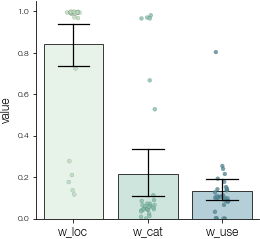

In [8]:
w_names = ['w_loc', 'w_cat', 'w_use']
w_param = pd.melt(
    res.loc['ICD-ER', w_names].reset_index(), id_vars='subject', 
    value_vars=w_names, var_name='parameter', value_name='value',
)
fig, ax = plt.subplots(figsize=(4, 4))
figures.plot_swarm_bar(w_param, x='parameter', y='value', point_kind='strip', ax=ax)